# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

from api_keys import weather_api_key
from citipy import citipy

In [30]:

#Casts a dataframe with two very long sets of random numbers formatted for use as random lat/long coordinates
cities_df = pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,1200)*100), "lat":(np.random.uniform(-0.9,0.9,1200)*100)})

####
#### API SAVER
####
cities_df = cities_df.truncate(after = 59)


cities_df.head()

#city = citipy.nearest_city(22.99,120.21)
#city.country_code

,long,lat
0,-19.098369,13.560598
1,-78.538576,27.757943
2,-21.165506,-64.217077
3,-54.235089,28.529854
4,133.368518,27.424757


## Generate Cities List

In [31]:
cities_name = []
countrycode = []
for i in range(0,len(cities_df['lat'])):
    
    #API saver
    if i>60:
        break
    
    
    lat = cities_df.iloc[i]['lat']
    long = cities_df.iloc[i]['long']
    city = citipy.nearest_city(lat,long)
    
    name = city.city_name
    cities_name.append(name)
    country = city.country_code
    countrycode.append(country)
    
cities_df['City'] = cities_name
cities_df['Country'] = countrycode
cities_df.head(10)

,long,lat,City,Country
0,-19.098369,13.560598,dakar,sn
1,-78.538576,27.757943,high rock,bs
2,-21.165506,-64.217077,chuy,uy
3,-54.235089,28.529854,saint george,bm
4,133.368518,27.424757,naze,jp
5,-169.129721,62.576780,lavrentiya,ru
6,-168.639075,80.148813,lavrentiya,ru
7,130.911006,-61.830759,new norfolk,au
8,21.138061,73.699249,skjervoy,no
9,119.067971,17.164950,balingasay,ph


In [32]:
#drop duplicate cities in cities_df
cities_copy = cities_df.copy()
new_cities = cities_copy.drop_duplicates("City", keep = 'first')

#reset cities_df's index and truncate at 499 to provide sample size of 500 random cities.
new_cities = new_cities.reset_index(drop = True)
new_cities = new_cities.truncate( after=499)
new_cities

,long,lat,City,Country
0,-19.098369,13.560598,dakar,sn
1,-78.538576,27.757943,high rock,bs
2,-21.165506,-64.217077,chuy,uy
3,-54.235089,28.529854,saint george,bm
4,133.368518,27.424757,naze,jp
5,-169.129721,62.576780,lavrentiya,ru
6,130.911006,-61.830759,new norfolk,au
7,21.138061,73.699249,skjervoy,no
8,119.067971,17.164950,balingasay,ph
9,-72.962460,-3.662038,iquitos,pe


In [33]:
api_key = weather_api_key


#Establish columns for data to be used in scatter plots
new_cities["Temp"]=""
new_cities["Humidity"]=""
new_cities["Cloudiness"]=""
new_cities["Wind (mph)"]=""
new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-19.098369,13.560598,dakar,sn,,,,
1,-78.538576,27.757943,high rock,bs,,,,
2,-21.165506,-64.217077,chuy,uy,,,,
3,-54.235089,28.529854,saint george,bm,,,,
4,133.368518,27.424757,naze,jp,,,,
5,-169.129721,62.576780,lavrentiya,ru,,,,
6,130.911006,-61.830759,new norfolk,au,,,,
7,21.138061,73.699249,skjervoy,no,,,,
8,119.067971,17.164950,balingasay,ph,,,,
9,-72.962460,-3.662038,iquitos,pe,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
#Use iterrows() to loop through the new_cities sample size and perform API calls for each 

In [35]:
#Test API block status

target_url=f"http://api.openweathermap.org/data/2.5/weather?q={new_cities.City[4]}&appid={weather_api_key}"
weather_json = requests.get(target_url).json()
print(weather_json)
#print(weather_api_key)
#print("       ")
#print("       ")
#print(weather_json["main"]["temp"])


#temp_list.append(weather_json["main"]["temp"])
#print(temp_list)

{'coord': {'lon': 129.48, 'lat': 28.37}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 298.64, 'feels_like': 304.67, 'temp_min': 298.15, 'temp_max': 299.15, 'pressure': 1010, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 20}, 'rain': {'1h': 0.13}, 'clouds': {'all': 75}, 'dt': 1599775295, 'sys': {'type': 1, 'id': 8013, 'country': 'JP', 'sunrise': 1599771919, 'sunset': 1599816748}, 'timezone': 32400, 'id': 1855540, 'name': 'Naze', 'cod': 200}


In [36]:
temp_list = []
humid_list = []
cloud_list = []
wind_list = []

for index, row in new_cities.iterrows():
    
    
    #API saver
    if index>60:
        break
    
    target_url=f"http://api.openweathermap.org/data/2.5/weather?q={row[2]}&appid={weather_api_key}"
    weather_json = requests.get(target_url).json()
    print(f"Processing Record {index} | {row[2]}")
    
    try:
        #new_cities.set_value(index, "Temp", weather_json["main"]["temp"])
        temp_list.append(weather_json["main"]["temp"])
        humid_list.append(weather_json["main"]["humidity"])
        cloud_list.append(weather_json["clouds"]["all"])
        wind_list.append(weather_json["wind"]["speed"])
        
        
        #add in list appends here for Humidity, Cloudiness, and Wind (mph)
        
        
        
        
        #new_cities.set_value(index, "Humidity", weather_json["main"]["humidity"])
        #new_cities.set_value(index, "Cloudiness", weather_json["clouds"]["all"])
        #new_cities.set_value(index, "Wind (mph)", weather_json["wind"]["speed"])
        
    except:
        temp_list.append("")
        humid_list.append("")
        cloud_list.append("")
        wind_list.append("")
        print("City not found. Skipping...")

Processing Record 0 | dakar
Processing Record 1 | high rock
Processing Record 2 | chuy
Processing Record 3 | saint george
Processing Record 4 | naze
Processing Record 5 | lavrentiya
Processing Record 6 | new norfolk
Processing Record 7 | skjervoy
Processing Record 8 | balingasay
Processing Record 9 | iquitos
Processing Record 10 | rikitea
Processing Record 11 | attawapiskat
City not found. Skipping...
Processing Record 12 | kalengwa
Processing Record 13 | katsuura
Processing Record 14 | jamestown
Processing Record 15 | east london
Processing Record 16 | ponta do sol
Processing Record 17 | abalak
Processing Record 18 | vardo
Processing Record 19 | juifang
City not found. Skipping...
Processing Record 20 | bethel
Processing Record 21 | fougamou
Processing Record 22 | mys shmidta
City not found. Skipping...
Processing Record 23 | ushuaia
Processing Record 24 | lata
Processing Record 25 | ribeira grande
Processing Record 26 | lakes entrance
Processing Record 27 | taolanaro
City not found. 

In [37]:
new_cities["Temp"] = temp_list
new_cities["Humidity"] = humid_list
new_cities["Cloudiness"] = cloud_list
new_cities["Wind (mph)"] = wind_list
###
### ADD A DROPNA STATEMENT DOWN BELOW TO REMOVE ALL MISSING OPTIONS
### OR DELETE BASED ON TEMP BEING "NAN" OR "" OR WHATEVER
### JUST MAKE SURE YOU DO IT
###

#print(len(temp_list))
 

def kelv_to_fahr(temp_kelv):
    """Convert Kelvin to Fahrenheit
    
    Return Fahrenheit conversion of input"""
    
    temp_fahr = (temp_kelv)* 9/5 - 459.67
    return temp_fahr


#converts the strings to numbers so they can be formatted into fahrenheit
#new_cities.dropna() to get rid of the empty variables where data was lacking
#or do a reverse loc statement, removing all that has this characteristic - "NaN" or "" 
#before numericization

#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)
new_cities = new_cities.drop(new_cities[new_cities.Temp == ""].index)

new_cities = new_cities.reset_index(drop = True)
new_cities["Temp"] = pd.to_numeric(new_cities["Temp"])
new_cities["Temp"] = kelv_to_fahr(new_cities["Temp"])



new_cities.head(10)

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-19.098369,13.560598,dakar,sn,84.200,89,75,2.1
1,-78.538576,27.757943,high rock,bs,84.200,83,75,3.6
2,-21.165506,-64.217077,chuy,uy,52.214,66,0,2.25
3,-54.235089,28.529854,saint george,bm,77.000,16,1,2.1
4,133.368518,27.424757,naze,jp,77.882,100,75,1
5,-169.129721,62.576780,lavrentiya,ru,46.868,72,98,2.94
6,130.911006,-61.830759,new norfolk,au,48.254,72,91,1.82
7,21.138061,73.699249,skjervoy,no,48.650,78,100,7.69
8,119.067971,17.164950,balingasay,ph,83.984,72,81,1.62
9,-72.962460,-3.662038,iquitos,pe,91.400,59,40,0.5


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
#export dataframe as csv
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-19.098369,13.560598,dakar,sn,84.200,89,75,2.1
1,-78.538576,27.757943,high rock,bs,84.200,83,75,3.6
2,-21.165506,-64.217077,chuy,uy,52.214,66,0,2.25
3,-54.235089,28.529854,saint george,bm,77.000,16,1,2.1
4,133.368518,27.424757,naze,jp,77.882,100,75,1


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [39]:
#To remove all rows where column 'score' is < 50:
#df = df.drop(df[df.score < 50].index)

new_cities = new_cities.drop(new_cities[new_cities.Humidity > 100].index)
new_cities.head()

,long,lat,City,Country,Temp,Humidity,Cloudiness,Wind (mph)
0,-19.098369,13.560598,dakar,sn,84.200,89,75,2.1
1,-78.538576,27.757943,high rock,bs,84.200,83,75,3.6
2,-21.165506,-64.217077,chuy,uy,52.214,66,0,2.25
3,-54.235089,28.529854,saint george,bm,77.000,16,1,2.1
4,133.368518,27.424757,naze,jp,77.882,100,75,1


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

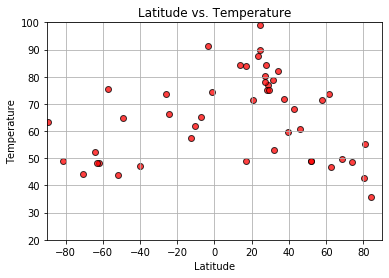

In [44]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Temp"]

plt.scatter(x_axis,data,marker="o",facecolors="red",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Temperature")
plt.xlim(-90,90)
plt.ylim(20,100)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

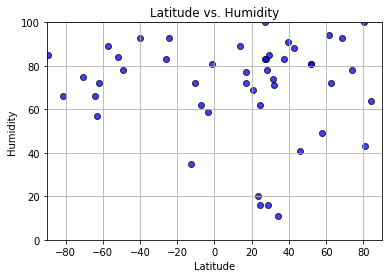

In [51]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Humidity"]

plt.scatter(x_axis,data,marker="o",facecolors="blue",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Humidity")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

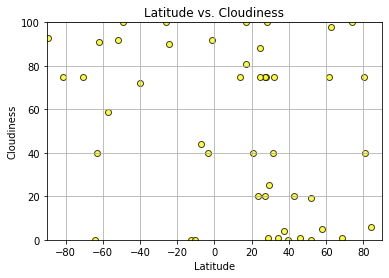

In [52]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Cloudiness"]

plt.scatter(x_axis,data,marker="o",facecolors="yellow",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Cloudiness")
plt.xlim(-90,90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

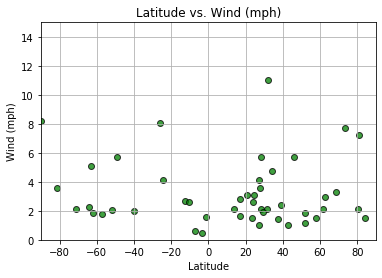

In [58]:
#plt.scatter(x,y,other this and that)
x_axis = new_cities["lat"]
data = new_cities["Wind (mph)"]

plt.scatter(x_axis,data,marker="o",facecolors="green",edgecolors="black", alpha=0.75)
# Generate latitudes(-90 to 90) 
plt.title("Latitude vs. Wind (mph)")
plt.xlim(-90,90)
plt.ylim(0,15)
plt.xlabel("Latitude")
plt.ylabel("Wind (mph)")
plt.grid(True)
plt.show()

## Linear Regression

In [ ]:
#Exactly as above, but need to create two new DFs - north and south - and then just run all the same graphs out of them. Easy.

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression